In [40]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

DNA_SIZE = 10            # DNA length
POP_SIZE = 100           # population size
CROSS_RATE = 0.8         # mating probability (DNA crossover)
MUTATION_RATE = 0.003    # mutation probability
N_GENERATIONS = 200
X_BOUND = [0, 5] # x upper and lower bounds

def F(x): 
    return np.sin(10*x)*x + np.cos(2*x)*x # to find the maximum of this function

# find non-zero fitness for selection
def get_fitness(pred): 
    return pred + 1e-3 - np.min(pred)

# convert binary DNA to decimal and normalize it to a range(0, 5)
def translateDNA(pop): 
    return pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2**DNA_SIZE-1) * X_BOUND[1]



def select(pop, fitness):    # nature selection wrt pop's fitness
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,
                           p=fitness/fitness.sum())
    return pop[idx]


def crossover(parent, pop):     # mating process (genes crossover)
    if np.random.rand() < CROSS_RATE:
        i_ = np.random.randint(0, POP_SIZE, size=1)                             # select another individual from pop
        cross_points = np.random.randint(0, 2, size=DNA_SIZE).astype(np.bool)   # choose crossover points
        parent[cross_points] = pop[i_, cross_points]                            # mating and produce one child
        
    return parent


def mutate(child):
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 if child[point] == 0 else 0
    return child



<IPython.core.display.Javascript object>


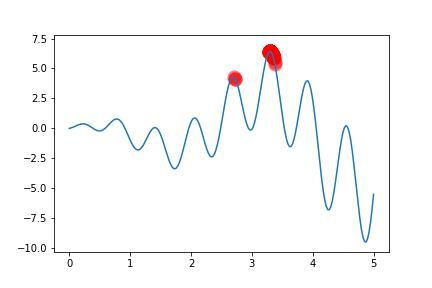

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


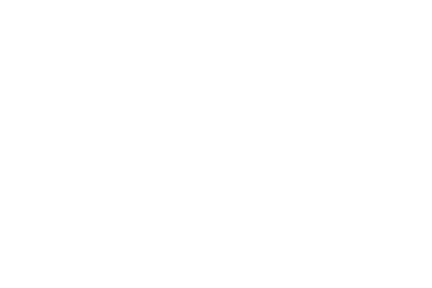

In [62]:
%matplotlib notebook
import time
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))   # initialize the pop DNA


fig, _ = plt.subplots(1,1)
x = np.linspace(*X_BOUND, 200)

for _ in range(N_GENERATIONS):
    F_values = F(translateDNA(pop))    # compute function value by extracting DNA

    plt.plot(x, F(x))
    plt.scatter(translateDNA(pop), F_values, s=200, lw=0, c='red', alpha=0.5); 
    fig.canvas.draw()

    # GA part (evolution)
    fitness = get_fitness(F_values)

#     print("Most fitted DNA: ", pop[np.argmax(fitness), :])
    
    pop = select(pop, fitness)
    pop_copy = pop.copy()

    for parent in pop:
        child = crossover(parent, pop_copy)
        child = mutate(child)
        parent[:] = child       # parent is replaced by its child
    
    time.sleep(0.5)
    fig.clear()
